In [111]:
import numpy as np

In [112]:
with open("./data_inputs/day13_input.txt") as f:
    input = f.read()

In [113]:
input_list = input.split("\n")
dots = [l.split(",") for l in input_list[:-13]]
dots = np.array([[int(d[0]), int(d[1])] for d in dots])
folds = [l[11:].split("=") for l in input_list[-12:]]
folds = [[f[0], int(f[1])] for f in folds]

In [114]:
dots_map = np.zeros((1311, 895), dtype=np.uint8)
dots_map[dots[:, 0], dots[: ,1]] = 1

In [115]:
def fold(dots_map, _fold):
    if _fold[0] == 'x':
        return dots_map[:_fold[1], :] + np.flipud(dots_map[(_fold[1] + 1):, :])
    if _fold[0] == 'y':
        return dots_map[:, :_fold[1]] + np.fliplr(dots_map[:, (_fold[1] + 1):])

In [116]:
# ----- PART 1 -----

folded_map0 = fold(dots_map, folds[0])

print("Result1:", np.sum(folded_map0 > 0))

Result1: 729


In [117]:
# ----- PART 2 -----

folded_map = dots_map.copy()

for _fold in folds:
    folded_map = fold(folded_map, _fold)
    

In [118]:
folded_map1 = folded_map > 0
folded_map_rot = np.fliplr(np.rot90(folded_map1, 3))

In [119]:
%matplotlib inline
from matplotlib import pyplot as plt

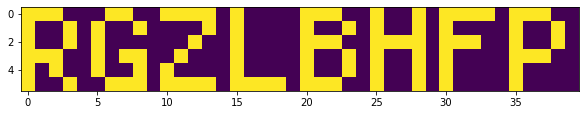

In [121]:
plt.imshow(folded_map_rot, interpolation="nearest")
plt.rcParams["figure.figsize"] = (12,4)
plt.show()